# 統計学入門 練習問題


## 1章 

## 1-1
- 日本の人口
- 日本の国家予算(一般会計)
- 日本の国民総生産




## 2章 記述統計学のキーワード
- 階級, 度数分布表, 累積(相対)度数, ヒストグラム
- ローレンツ曲線とジニ係数
- 測定の尺度
    - 名義尺度, 順序尺度, 間隔尺度, 比例尺度
- 代表値
    - 平均値, 中央値, 最頻値, 第一四分位数, 第三四分位数, 最大値, 最小値
- 散らばりの尺度
    - 範囲, 四分位範囲, 平均偏差, 分散, 変動係数, 標準化, 偏差値
- 右裾分布の特徴: Mean > Medeian > Mode (アルファベット順で覚える)

### 算術平均(よくある平均)
$$ \bar{x} = \frac{x_1 + x_2 + \cdots +x_n}{n} $$

### 幾何平均(割合の平均)
$$ x_G = (x_1 * x_2 * \cdots * x_n )^\frac{1}{n} $$

### 調和平均(平均時速など)
$$ \frac{1}{x_H} = \frac{1}{n}(\frac{1}{x_1} + \frac{1}{x_2} + \cdots + \frac{1}{x_n}) $$

### 分散と標準偏差
$$ S^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2, \quad S_x = \sqrt{S_x^2} $$

### 変動係数
$$ CV = \frac{S_x}{\bar{x}} $$

### 標準化
$$ z_i = \frac{x_i - \bar{x}}{S_x} $$

### 偏差値
$$ T_i = 10 z_i + 50 $$


## 2-2
- 平均差
$$ \sum_i \sum_j \frac{|x_i - x_j|}{n^2} $$
- ジニ係数
$$
GI = \sum_i \sum_j \frac{|x_i - x_j|}{2 n^2 \bar{x}}
$$


In [505]:
import pandas as pd
from itertools import product, permutations
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

DATA = {
    'A': [0, 3, 3, 5, 5, 5, 5, 7, 7, 10],
    'B': [0, 1, 2, 3, 5, 5, 7, 8, 9, 10],
    'C': [3, 4, 4, 5, 5, 5, 5, 6, 6, 7],
}

df = pd.DataFrame(DATA)
df.describe()

,A,B,C
count,10.000000,10.000000,10.000000
mean,5.000000,5.000000,5.000000
std,2.708013,3.464102,1.154701
min,0.000000,0.000000,3.000000
25%,3.500000,2.250000,4.250000
50%,5.000000,5.000000,5.000000
75%,6.500000,7.750000,5.750000
max,10.000000,10.000000,7.000000


In [2]:
# pandas と numpy の標準偏差の自由度が異なる
print(np.std(df['A']), df['A'].std())
# 自由度を指定しておけば間違える心配は無い
print(np.std(df['A'], ddof=0), df['A'].std(ddof=0))

2.569046515733026 2.70801280154532
2.569046515733026 2.569046515733026


In [3]:

# 平均差
for t in df.columns:
    total = 0
    for i, j in list(permutations(df[t], 2)):
        total += np.abs(i-j)
    meanDifference = total / (df[t].count()**2)
    print(f'平均差 {t} = {meanDifference:.03f}')
    
# ジニ係数
for t in df.columns:
    total = 0
    for i, j in list(permutations(df[t], 2)):
        total += np.abs(i-j)
    meanDifference = total / (2 * df[t].mean() * (df[t].count()**2))
    print(f'ジニ係数 {t} = {meanDifference:.03f}')

平均差 A = 2.760
平均差 B = 3.760
平均差 C = 1.200
ジニ係数 A = 0.276
ジニ係数 B = 0.376
ジニ係数 C = 0.120


## 2-3 エントロピー


- カテゴリーの相対頻度
$$ \hat{p} = \frac{f_i}{n} $$

- エントロピー
$$ H(\hat{p_1}, \hat{p_1}, \cdots \hat{p_k}) - \sum_{i=1}^h \hat{p_i} \log \hat{p_i} $$

- $H(\hat{p_1}, \hat{p_1}, \cdots \hat{p_k}) \geq 0$
- どれかの $\hat{p}=1$ のとき、$H(\hat{p_1}, \hat{p_1}, \cdots \hat{p_k})=0$
- $H(\hat{p_1}, \hat{p_1}, \cdots \hat{p_k}) \leq H(1/k, 1/k, \cdots 1/k)$ 最大値

が成り立つ。この量をエントロピーという

In [57]:
df = pd.read_csv('2-3.csv', index_col=0).T
df

,ThisYear,10YearsAgo
A,32,28
B,19,13
C,10,18
D,24,29
E,15,12


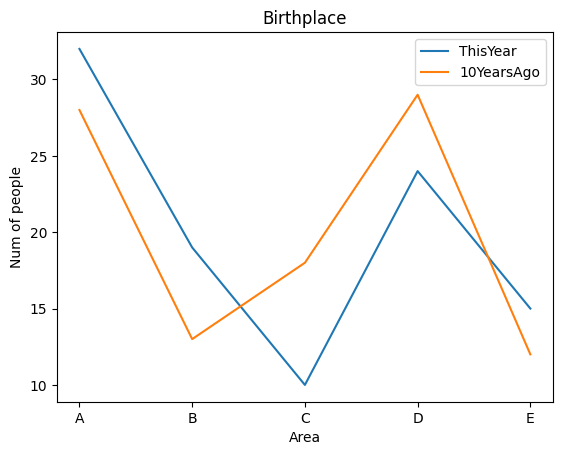

In [64]:
displayData = ['ThisYear', '10YearsAgo'],
for data in displayData:
    plt.plot(df[data], label=data)
plt.title('Birthplace')
plt.xlabel('Area')
plt.ylabel('Num of people')
plt.legend()
plt.show()

In [138]:
p = df['ThisYear'] / sum(df['ThisYear'])
print(f'ThisYear entropy = {-sum(p * np.log10(p)):.05f}')
p = df['10YearsAgo'] / sum(df['10YearsAgo'])
print(f'10YearsAgo entropy = {-sum(p * np.log10(p)):.05f}')
print('値はほとんど変化なく、集中性に変化はない')

ThisYear entropy = 0.66772
10YearsAgo entropy = 0.67044
値はほとんど変化なく、集中性に変化はない


## 2-4
- 標準得点
$$ z_i = \frac{x_i - \bar{x}}{s_x} $$
- 偏差値得点
$$ T_i = 10 x_i + 50 $$

In [194]:
df = pd.read_csv('2-3Data.csv', header=None, index_col=0).T
df.head()

,A,B,C
1,0,0,3
2,3,1,4
3,3,2,4
4,5,3,5
5,5,5,5


In [205]:
def new_func(column):
    print(f'Result of column "{column}"')
    print(f'算術平均 = {df[column].mean()}')
    print(f'標準偏差 = {df[column].std(ddof=0)}')
    stdPoint = (df[column] - df[column].mean()) / df[column].std(ddof=0)
    print([f'{p:.01f}' for p in stdPoint])
    hensachi = (df[column] - df[column].mean()) / df[column].std(ddof=0) *10 + 50
    print([f'{p:.01f}' for p in hensachi])

new_func('B')

Result of column "B"
算術平均 = 5.0
標準偏差 = 3.286335345030997
['-1.5', '-1.2', '-0.9', '-0.6', '0.0', '0.0', '0.6', '0.9', '1.2', '1.5']
['34.8', '37.8', '40.9', '43.9', '50.0', '50.0', '56.1', '59.1', '62.2', '65.2']


## 第3章 

### 2次元のデータ
### 散布図と分割表
### 相関係数

相関係数の数字のみを判断の基準とすることは誤解を生みやすく、散布図を書いて確かめることが重要である
- ピアソンの積率相関係数
$$
r_{xy}
= \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i-\bar{x})^2} \sqrt{\sum(y_i - \bar{y})^2}}
= \frac{Cov[x, y]}{S_x S_y}
$$

- スピアマンの順位相関係数
    - $R_i, R_i'$ に通常の積率相関係数の式を適用したもの
$$ r_s = 1-\frac{6}{n^3 - n} \sum(R_i - R_i')^2 $$

- ケンドールの順位相関係数
    - 正順、すなわち $R_i > R_k, R'_i > R'_k$、あるいは $R_i < R_k, R'_i < R'_k$ の場合には+1の値を与え
    - 逆順、すなわち $R_i > R_k, R'_i < R'_k$、あるいは $R_i < R_k, R'_i > R'_k$  の場合には-1の値を与え
    - $+1$ を与えた対の数 $G$ と $-1$ を与えた対の数 $H$ の大小関係をみる
$$r _K = \frac{G-H}{n(n-1)/2} $$

- 正の完全相関、負の完全相関
$$ r_{xy} = 1, \ r_{xy} = -1 $$

- 見かけ上の相関と偏相関係数
    - 変数３の影響を除いたあとの変数１と変数２の 間の相関係数
$$ r_{12 \cdot 3} = \frac{r_{12}-r_{13}r_{23}}{\sqrt{(1 - r_{13}^2)} \sqrt{(1 - r_{23}^2)}} $$

- 遅れ $h$ の自己相関係数
$$ r_h = \frac{\sum_{i=1}^{n-h}(x_i - \bar{x})(x_{i+h}-\bar{x})/(n-h)}{\sum_{i=1}^n(x_i-\bar{x})^2/n} $$

- 直線および平面のあてはめ(単回帰分析と重回帰分析)
$$ y = \beta_0 + \beta_1 x $$
$$
\beta_1
= \frac{\sum(x_i-\bar{x})(y_i - \bar{y})}{\sum (x_i -\bar{x})^2}
= \frac{\sum(x_i y_i - n\bar{x}\bar{y})}{\sum x_i^2 - n\bar{x}^2}
 , \quad \beta_0 = \bar{y} -beta_1 \bar{x} $$

- 決定係数
$$ r_{xy}^2 $$

## 3-1 練習問題

In [275]:
import unicodedata
unicodedata.normalize("NFKC", '１２３')

tokuhyou = '''
４１．４ ７６．３ ５９．２ ５１．８ ５２．５ ５３．２ ６２．４ ５５．０ ５７．７
６３．２ ３７．５ ４８．５ ３２．４ ２０．５ ４７．９ ６８．９ ６８．５ ５２．５ ６３．３ ５８．８
５９．７ ４８．４ ４０．７ ５１．０ ５０．９ ３４．３ ２５．８ ３２．１ ３４．４ ５５．１ ６０．３
５７．０ ４５．６ ５４．２ ５５．１ ５５．７ ７０．３ ６１．８ ４７．６ ４２．５ ７１．３ ５５．２
６５．２ ４２．９ ５４．７ ６２．０ ４８．２
'''

mochiie = '''
５２．８ ７１．２ ７２．６ ６３．７ ８１．３ ８１．８ ７０．９ ７４．０ ７３．２
７２．９ ６６．７ ６５．７ ４３．７ ５５．５ ７９．６ ８５．７ ７５．３ ８０．５ ７３．０ ７７．０
７７．５ ６９．２ ６０．０ ７８．２ ７９．５ ６１．８ ４９．６ ５９．６ ７２．１ ７１．０ ７６．３
７２．８ ７１．８ ６０．７ ６７．０ ７１．８ ７１．２ ６８．３ ６８．５ ５４．８ ７６．０ ６５．８
６９．４ ６６．９ ６９．７ ７１．２ ５９．６
'''

todoufuken = '''
北海道 青森 岩手 宮城 秋田 山形 福島 茨城 栃木
群馬 埼玉 千葉 東京 神奈川 新潟 富山 石川 福井 山梨 長野
岐阜 静岡 愛知 三重 滋賀 京都 大阪 兵庫 奈良 和歌山 鳥取
島根 岡山 広島 山口 徳島 香川 愛媛 高知 福岡 佐賀 長崎
熊本 大分 宮崎 鹿児島 沖縄 
'''

tokuhyouritsu = [float(unicodedata.normalize("NFKC", a)) for a in tokuhyou.split()]
mochiieritsu = [float(unicodedata.normalize("NFKC", a)) for a in mochiie.split()]
todoufuken = todoufuken.split()    

In [276]:
df = pd.DataFrame(
    [tokuhyouritsu, mochiieritsu],
    columns=todoufuken,
    index=['自民得票率', '持ち家比率']
)

          自民得票率     持ち家比率
自民得票率  1.000000  0.638782
持ち家比率  0.638782  1.000000


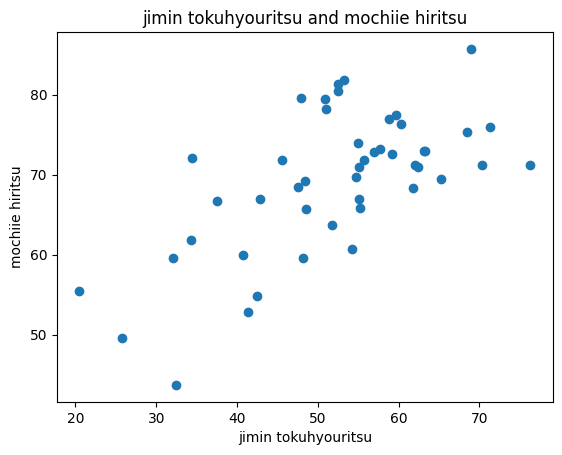

In [277]:
plt.scatter(df.iloc[:1], df.iloc[1:])
print(df.T.corr())
plt.title('jimin tokuhyouritsu and mochiie hiritsu')
plt.xlabel('jimin tokuhyouritsu')
plt.ylabel('mochiie hiritsu')
plt.show()

スピアマンの順位相関
$$ r_s = 1-\frac{6}{n^3 - n} \sum(R_i - R_i')^2 $$

In [311]:
df = pd.read_csv('3-14.csv', index_col=0)
df.astype(int)
df.head()

,女性有権者団体,短期大学生,経営者団体,大学教授・研究者・専門職等
原子力,1,1,8,20
自動車,2,5,3,1
銃(handgun),3,2,1,4
喫煙,4,3,4,2
バイク,5,6,2,6


In [337]:
from itertools import permutations
list(permutations(df.columns, 2))

[('女性有権者団体', '短期大学生'),
 ('女性有権者団体', '経営者団体'),
 ('女性有権者団体', '大学教授・研究者・専門職等'),
 ('短期大学生', '女性有権者団体'),
 ('短期大学生', '経営者団体'),
 ('短期大学生', '大学教授・研究者・専門職等'),
 ('経営者団体', '女性有権者団体'),
 ('経営者団体', '短期大学生'),
 ('経営者団体', '大学教授・研究者・専門職等'),
 ('大学教授・研究者・専門職等', '女性有権者団体'),
 ('大学教授・研究者・専門職等', '短期大学生'),
 ('大学教授・研究者・専門職等', '経営者団体')]

In [338]:
# c1, c2 = list(combinations(df.columns, 2))[0]
for c1, c2 in list(permutations(df.columns, 2)):
    n = df.shape[0]
    diff = df[c1] - df[c2]
    r = 1 - 6 / (n**3 - n) * np.sum(diff**2)
    print(f'{c1} と {c2} のスピアマン相関係数は {r:.03f}')

女性有権者団体 と 短期大学生 のスピアマン相関係数は 0.822
女性有権者団体 と 経営者団体 のスピアマン相関係数は 0.923
女性有権者団体 と 大学教授・研究者・専門職等 のスピアマン相関係数は 0.531
短期大学生 と 女性有権者団体 のスピアマン相関係数は 0.822
短期大学生 と 経営者団体 のスピアマン相関係数は 0.632
短期大学生 と 大学教授・研究者・専門職等 のスピアマン相関係数は 0.624
経営者団体 と 女性有権者団体 のスピアマン相関係数は 0.923
経営者団体 と 短期大学生 のスピアマン相関係数は 0.632
経営者団体 と 大学教授・研究者・専門職等 のスピアマン相関係数は 0.436
大学教授・研究者・専門職等 と 女性有権者団体 のスピアマン相関係数は 0.531
大学教授・研究者・専門職等 と 短期大学生 のスピアマン相関係数は 0.624
大学教授・研究者・専門職等 と 経営者団体 のスピアマン相関係数は 0.436


## とある機種の確率を使って考察をしてみる

- 当りの確率
- 1000回ごとの当り回数の平均と分散

In [489]:
df = pd.read_csv('myj.csv', index_col=0)
df

,BIG,REG,ボーナス合算,機械割
設定,,,,
1,273.1,409.6,163.8,97.0
2,270.8,385.5,159.1,98.0
3,266.4,336.1,148.6,99.9
4,254.0,290.0,135.4,102.8
5,240.1,268.6,126.8,105.3
6,229.1,229.1,114.6,109.4


In [490]:
df['bonusProbability'] = (1  / df.iloc[:, 2])
df

,BIG,REG,ボーナス合算,機械割,bonusProbability
設定,,,,,
1,273.1,409.6,163.8,97.0,0.006105
2,270.8,385.5,159.1,98.0,0.006285
3,266.4,336.1,148.6,99.9,0.006729
4,254.0,290.0,135.4,102.8,0.007386
5,240.1,268.6,126.8,105.3,0.007886
6,229.1,229.1,114.6,109.4,0.008726


In [504]:
dfP = pd.DataFrame({f'bonusProbability': (1  / df.iloc[:, 2])})
for i in range(4):
    numOfRotaions = (i+1) * 2000
    dfP[f'expected {numOfRotaions}'] = df['bonusProbability'] * numOfRotaions
    dfP[f'std {numOfRotaions}'] = np.sqrt(df['bonusProbability'] * (1 - df['bonusProbability']) * numOfRotaions)
dfP

,bonusProbability,expected 2000,std 2000,expected 4000,std 4000,expected 6000,std 6000,expected 8000,std 8000
設定,,,,,,,,,
1,0.006105,12.210012,3.483600,24.420024,4.926555,36.630037,6.033772,48.840049,6.967200
2,0.006285,12.570710,3.534360,25.141420,4.998339,37.712131,6.121691,50.282841,7.068720
3,0.006729,13.458950,3.656279,26.917900,5.170760,40.376851,6.332862,53.835801,7.312559
4,0.007386,14.771049,3.829093,29.542097,5.415156,44.313146,6.632184,59.084195,7.658187
5,0.007886,15.772871,3.955816,31.545741,5.594368,47.318612,6.851674,63.091483,7.911632
6,0.008726,17.452007,4.159293,34.904014,5.882129,52.356021,7.204107,69.808028,8.318587


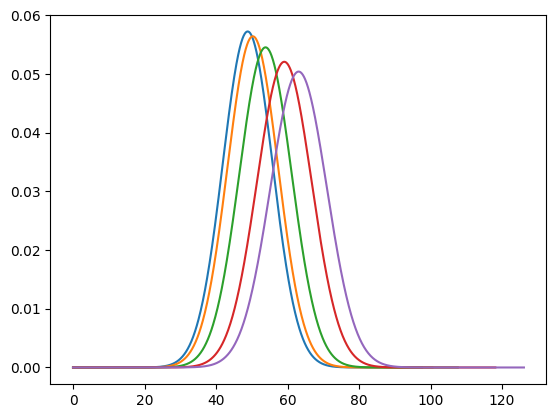

In [529]:
pos = 7
for i in range(5):
    x = np.arange(0, dfP.iloc[i, pos]*2, 0.1)
    y = norm.pdf(x, dfP.iloc[i, pos], dfP.iloc[i, pos+1])
    plt.plot(x, y)
plt.show()

## 4章 確率